# SVM Guided Example + Challenge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import linear_model
from sklearn import preprocessing
np.set_printoptions(suppress=True)
from IPython.display import display
pd.options.display.float_format = '{:.3f}'.format

/Users/wliao/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count   20052.000
mean        3.714
std         1.341
min         0.000
25%         3.750
50%         4.375
75%         4.375
max         5.000
Name: rating, dtype: float64

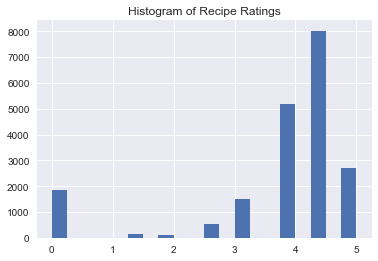

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

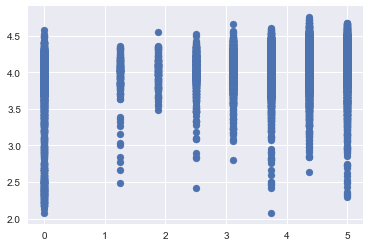

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

0.038565706512988962

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

## Challenge

### Preparation

In [11]:
# Create variables for binary classifier
raw_data['rating_class'] = np.where((raw_data['rating'] > 3),'1','0')

In [12]:
# Drop original 'rating' attribute
raw_data = raw_data.drop('rating',axis=1)

In [13]:
# Drop rows with missing values
df = raw_data
df = df.dropna()

In [14]:
# Reduce data set to only numeric variables
df = df.drop('title',axis=1)

In [15]:
# Assign features and target variable
x = df.drop('rating_class',axis=1)
y = df['rating_class']

### Feature Selection

#### Recursive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
from sklearn import ensemble

model = LogisticRegression()
names = df.columns

rfe = RFE(model, 30)
rfe.fit(x,y)

print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, '22-minute meals'), (1, 'beef rib'), (1, 'bok choy'), (1, 'braise'), (1, 'brussel sprout'), (1, 'casserole/gratin'), (1, 'chile pepper'), (1, 'condiment'), (1, 'drink'), (1, "father's day"), (1, 'goat cheese'), (1, 'harpercollins'), (1, 'ice cream'), (1, 'kentucky derby'), (1, 'leftovers'), (1, 'low carb'), (1, 'low sugar'), (1, 'massachusetts'), (1, 'new york'), (1, 'oatmeal'), (1, 'pancake'), (1, 'pickles'), (1, 'pie'), (1, 'rosh hashanah/yom kippur'), (1, 'snack'), (1, 'stuffing/dressing'), (1, 'tamarind'), (1, 'tomatillo'), (1, 'vermouth'), (1, 'weelicious'), (2, 'bon appétit'), (3, 'gourmet'), (4, 'super bowl'), (5, 'stir-fry'), (6, 'amaretto'), (7, '3-ingredient recipes'), (8, 'tree nut'), (9, 'créme de cacao'), (10, 'gin'), (11, 'rye'), (12, 'watermelon'), (13, 'melon'), (14, 'house cocktail'), (15, 'campari'), (16, 'easter'), (17, 'sauté'), (18, 'friendsgiving'), (19, 'cookbook critic'), (20, "new year's day"), (21, 'california'), (22, 'penns

#### Extra Trees Classifier

In [17]:
# Select top 30 attributes from data 
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate model
forest = ExtraTreesClassifier(n_estimators=250)

# Fit model to data
forest.fit(x,y)
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.032173)
2. feature 3 (0.030868)
3. feature 1 (0.027682)
4. feature 2 (0.027490)
5. feature 190 (0.017349)
6. feature 244 (0.014964)
7. feature 61 (0.014670)
8. feature 281 (0.013218)
9. feature 12 (0.011795)
10. feature 601 (0.009780)
11. feature 506 (0.009696)
12. feature 239 (0.008256)
13. feature 640 (0.007964)
14. feature 266 (0.007475)
15. feature 137 (0.007233)
16. feature 36 (0.007080)
17. feature 665 (0.007021)
18. feature 309 (0.006926)
19. feature 208 (0.006888)
20. feature 658 (0.006745)
21. feature 638 (0.006714)
22. feature 381 (0.006377)
23. feature 138 (0.006366)
24. feature 546 (0.006101)
25. feature 328 (0.005918)
26. feature 196 (0.005807)
27. feature 271 (0.005774)
28. feature 180 (0.005734)
29. feature 310 (0.005622)
30. feature 426 (0.005508)
31. feature 639 (0.005498)
32. feature 564 (0.005453)
33. feature 125 (0.005447)
34. feature 174 (0.005397)
35. feature 628 (0.005393)
36. feature 148 (0.005341)
37. feature 232 (0.005278)
38. 

In [18]:
rf_features = x[x.columns[[indices[0:30]]]]

#### Mutual Information

In [19]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Instantiate selector
selector = SelectKBest(mutual_info_classif,k=30)

# Fit selector
selector.fit(x,y)

# Assign indices of selected features to idxs_selected
idxs_selected = selector.get_support(indices=True)

# Assign selected features to mi_features
mi_features = x[x.columns[[idxs_selected]]]

### Modeling

The model performs significantly better after feature selection/reduction.

#### SVM using features from Extra Trees

In [20]:
from sklearn.svm import SVR

# Instantiate SVR
svr = SVR()

# Fit SVR
svr.fit(rf_features,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
# Evaluate performance
svr.score(rf_features,y)

0.84328012155462206

In [22]:
from sklearn.model_selection import cross_val_score

# Cross validate
scores = cross_val_score(svr, rf_features, y, cv=5)

In [23]:
# Evaluate performance
scores

array([ 0.0750151 ,  0.06723222,  0.06879104,  0.07877062,  0.08755606])

#### SVM using features from Mutual Information 

In [24]:
from sklearn.svm import SVR

# Instantiate SVR
svr = SVR()

Fit SVR to data
svr.fit(mi_features,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
# Evaluate performance
svr.score(mi_features,y)

0.80953865118013013

In [26]:
from sklearn.model_selection import cross_val_score

# Cross validate
scores = cross_val_score(svr, mi_features, y, cv=5)

In [27]:
# Evaluate scores 
scores

array([ 0.05033963,  0.0455884 ,  0.04834282,  0.06125725,  0.06671007])